# Module 8: Logistic Regression

# Introduction

In this module, we will introduce logistic regression and learn how to fit and evaluate logistic regression models. We will also discuss the assumptions and limitations of logistic regression, and learn how to interpret the output of logistic regression using Python. Finally, we will describe receiver operating characteristics and their importance for logistic regression.

# Learning Outcomes

In this module, you will:

* Become familiar with logistic regression analysis
* Examine the assumptions, limitations and strengths of logistic regression
* Learn how to evaluate logistic regression models

# Reading and Resources

We invite you to further supplement this notebook with the following recommended texts:

Diez, D., Çetinkaya-Rundel, M., Barr, C.D. (2019). Chapter 9: Multiple and Logistic Regression in *OpenIntro Statistics (4th Ed.).* https://www.openintro.org/stat/textbook.php?stat_book=os

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-8:-Logistic-Regression" data-toc-modified-id="Module-8:-Logistic-Regression">Module 8: Logistic Regression</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Reading-and-Resources" data-toc-modified-id="Reading-and-Resources">Reading and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression">Logistic Regression</a></span>
<ul class="toc-item">
<li><span><a href="#Introduction-to-logistic-regression" data-toc-modified-id="Introduction-to-logistic-regression">Introduction to logistic regression</a></span>
</li>
<li><span><a href="#Visual-interpretation" data-toc-modified-id="Visual-interpretation">Visual interpretation</a></span>
</li>
<li><span><a href="#Underlying-assumptions" data-toc-modified-id="Underlying-assumptions">Underlying assumptions</a></span>
</li>
<li><span><a href="#Fitting-the-logistic-regression-model" data-toc-modified-id="Fitting-the-logistic-regression-model">Fitting the logistic regression model</a></span>
<ul class="toc-item">
<li><span><a href="#Newton-method" data-toc-modified-id="Newton-method">Newton method</a></span>
</li>
</ul>
</li>
</ul>
</li>
<li><span><a href="#Understanding-Regression-Output" data-toc-modified-id="Understanding-Regression-Output">Understanding Regression Output</a></span>
</li>
<li><span><a href="#Evaluation-of-the-Logistic-Regression-Model" data-toc-modified-id="Evaluation-of-the-Logistic-Regression-Model">Evaluation of the Logistic Regression Model</a></span>
<ul class="toc-item">
<li><span><a href="#Pseudo-R-squared" data-toc-modified-id="Pseudo-R-squared">Pseudo R-squared</a></span>
</li>
<li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix">Confusion matrix</a></span>
</li>
<li><span><a href="#Statistical-accuracy" data-toc-modified-id="Statistical-accuracy">Statistical accuracy</a></span>
<ul class="toc-item">
<li><span><a href="#A-word-of-caution-with-statistical-accuracy" data-toc-modified-id="A-word-of-caution-with-statistical-accuracy">A word of caution with statistical accuracy</a></span>
</li>
</ul>
</li>
<li><span><a href="#Matthews-correlation-coefficient-(MCC)" data-toc-modified-id="Matthews-correlation-coefficient-(MCC)">Matthews correlation coefficient (MCC)</a></span>
</li>
<li><span><a href="#Precision,-recall,-specificity-and-F-score" data-toc-modified-id="Precision,-recall,-specificity-and-F-score">Precision, recall, specificity and F-score</a></span>
</li>
</ul>
</li>
<li><span><a href="#Receiver-Operating-Characteristic" data-toc-modified-id="Receiver-Operating-Characteristic">Receiver Operating Characteristic</a></span>
<ul class="toc-item">
<li><span><a href="#Area-Under-ROC-Curve-(AUROC)" data-toc-modified-id="Area-Under-ROC-Curve-(AUROC)">Area Under ROC Curve (AUROC)</a></span>
</li>
<li><span><a href="#Youden's-J" data-toc-modified-id="Youden's-J">Youden's J</a></span>
</li>
<li><span><a href="#Point-of-balance" data-toc-modified-id="Point-of-balance">Point of balance</a></span>
</li>
</ul>
</li>
<li><span><a href="#Setting-the-Discrimination-Threshold" data-toc-modified-id="Setting-the-Discrimination-Threshold">Setting the Discrimination Threshold</a></span>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Logistic Regression

In contrast to linear regression analysis &mdash; which is applied when the response variable is a continuous variable &mdash; logistic regression is used when the response variable is a categorical variable. Here we will focus on the most prominent case, which is when the response is a **binary variable**. Logistic regression is extremely useful, since many real-life problems can be reduced to a problem involving estimation of a binary variable.

For example:

 - Is a customer going to buy an item? (Yes / No)
 - Is an email spam? (Yes / No)
 - Does a patient suffer from the disease? (Yes / No)

## Introduction to logistic regression

In the previous module, we learned that the objective of regression analysis is to estimate the value of a random variable given the value of an associated variable. We can say that logistic regression is a form of regression analysis where the response variable is a **random categorical variable**.

Hereafter, we will limit ourselves to the case where the response variable is a **binary variable**.

Thus, the response $y$ takes the value:

  - 1 when a certain condition is met with probability $p$
  - 0 with probability $1 - p$ when the condition is not met
  
The probability $p$ is often denoted as the **"odds".**

In logistic regression, the odds are estimated using a framework which incorporates linear regression. This framework can be mathematically formulated as follows:

$$\text{Logit}(p_i) = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \ldots + \beta_k x_{k,i}$$


where:

  - $p$ denotes the **odds** that $y$ will take on value 1
  - $x_{1, i}, x_{2, i},\ldots, x_{k, i}$ are the $i$-th values of the predictors (can be categorical or numerical)
  - $\beta_0$ is the intercept and $\beta_1, \beta_2, \ldots, \beta_k$ are the regression coefficients
  - $\text{Logit}$, or sometimes also called log-odds, is **the link function** that transforms output of the linear regression into odds:
  
  $$\text{Logit}\,(p) = ln \frac{p}{1 - p(x)}$$
  
  
from which we obtain:
  
  $$p = \frac{1}{1 + e^{\,\text{Logit}(p)}}$$


Estimates of the actual values of $y$ are derived as follows:

\begin{equation}
  \hat{y}_i =
  \begin{cases}
    1 & \text{if $p_i > p_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

Where $p_{th}$ is the **discrimination threshold**. Most implementations of logistic regression use a default discrimination threshold equal to $0.5$.

**NOTE:** A key reason why logistic regression requires the link function is that linear models require the residuals to be normally distributed. Thus, applying linear regression directly to estimate the odds $p$ is not possible.

A more straightforward interpretation is that logistic regression consists of the application of linear regression to predict the value of a variable $y'$, called a **latent variable**:

$$y' = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \ldots + \beta_k x_{k,i}$$


which is in turn is used to estimate $y$ by applying the following:

\begin{equation}
  \hat{y}_i =
  \begin{cases}
    1 & \text{if $y'_i > y'_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

or, even simpler:

\begin{equation}
  \hat{y}_i =
  \begin{cases}
    1 & \text{if $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \ldots + \beta_k x_{k,i} > y'_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

where $y'_{th}$ is the discrimination threshold of the latent variable $y'$.

## Visual interpretation

The figure below shows the association between the odds $p$ and the logit function of odds, $\text{Logit}\,(p)$. The association between the two is a monotonically increasing sigmoid curve with an inflection point located at ($p = 0.5$, $\text{Logit}\,(p) = 0$). When the odds are greater than $0.5$, values of $\text{Logit}\,(p)$ are positive and the predicted response is $\widehat{y} = 1$. Conversely, when the odds are lower than $0.5$, values of $\text{Logit}\,(p)$ are negative and the predicted response is $\widehat{y} = 0$.

![logit_function_modif.png](attachment:logit_function_modif.png "Visual interpretation")

**Image Source**: Diez et al (2015)
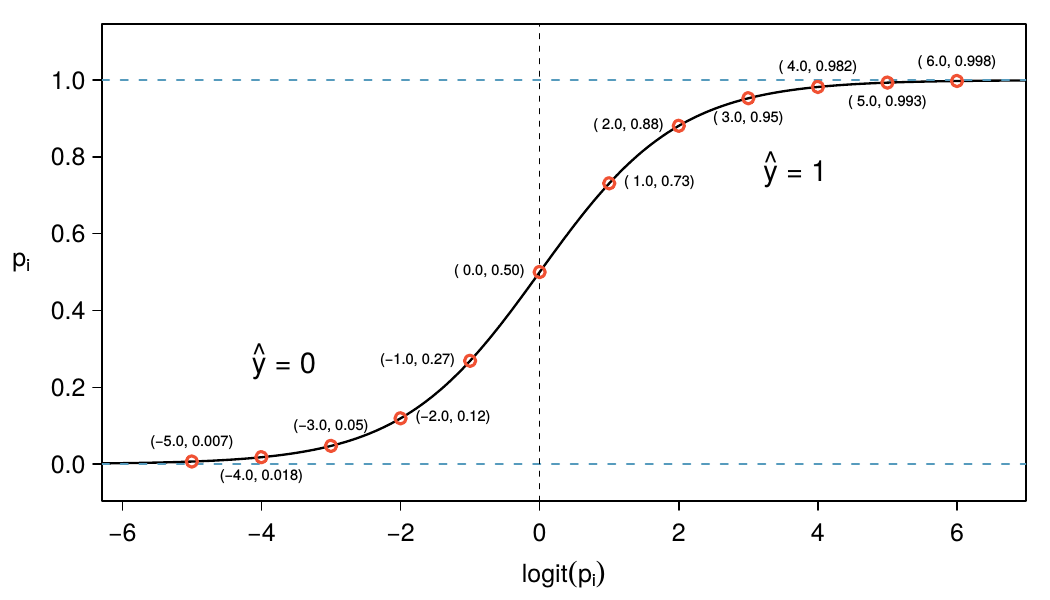

## Underlying assumptions

Logistic regression is based on **a different set of assumptions** about the relationship between dependent and independent variables than those of linear regression. Some differences between the two methods are obvious, and stem from the distinct nature of the response variable. These include:

 - **No requirement of linearity** of the relationship between the response and predictor
 
 
 - **No requirement of homoskedasticity** of the response variable

Other key differences in the underlying assumptions, which are less obvious include:

  - The distribution of $\theta$ is **a Bernoulli distribution**, rather than a Gaussian (normal) distribution
  
  
  - Logistic regression makes **no particular assumptions about the distribution of the model residuals**
  
On the other hand, some other assumptions of linear regression hold here too:

  - Logistic regression requires the observations to be **independent** of each other
  
  
  - Logistic regression requires there to be little or **no multicollinearity** among the independent variables
  
For more on multicollinearity, see Multicollinearity, (n.d.): https://en.wikipedia.org/wiki/Multicollinearity

## Fitting the logistic regression model

There is a substantial difference between the methods used to fit linear and logistic regression models: 

  - For linear regression, the model parameters are estimated by minimizing the sum of squares of model residuals.
  
  
  - However, for logistic regression, the model parameters are estimated by **maximizing the probability of obtaining the set of observations of binary response $y$**, given the parameter estimates. 
    
This latter procedure is called **maximum likelihood estimation**. If you are interested, its thorough explanation can be found here (Weisstein, E. W., 2018): http://mathworld.wolfram.com/MaximumLikelihood.html. Its application to fitting logistic regression models is further described here (Czepiel, S.A., 1999): https://czep.net/stat/mlelr.html.

### Newton method

The **Newton method** is typically used to estimate the model parameters. This method is an iterative process, which starts with a tentative solution (a set of initial parameter estimates of $\beta$). These estimates are then improved by iteratively applying the following steps:

  1.  The solution is revised slightly, to test if it can be improved.<br><br>
  
  2.  If it has improved, the revised solution is adopted as a candidate solution, replacing the previous one.
  
This process is repeated until no more improvement is made, at which point the process is said to have converged. The resulting set of parameter estimates is called **optimal**.

There are two **important practical consequences** of this approach:

  1. Estimation of logistic regression parameters is typically fairly slow (i.e. requires much more computational time than linear regression).<br><br>
  
  2. Accurate estimation of logistic regression parameters requires a larger number of observations than linear regression. **The rule of ten** states (without any scientific rigor) that logistic regression models require a minimum of about 10 observations per predictor variable.

**EXERCISE 1**

With the dataset provided in the file `ucla_binary.csv`, use logistic regression to estimate whether a student will be admitted to university using the **student's GPA** and **GRE score** along with the **rank** indicating the prestige of the student's undergraduate institution.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# And some functions we will need
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [3]:
# Read the data
df = pd.read_csv("./module08/ucla_binary.csv")


In [4]:
# Your work here

**Solution**

In [5]:
# Let's take a look on the first few rows
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
# Let's take a look at the statistics across individual columns
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


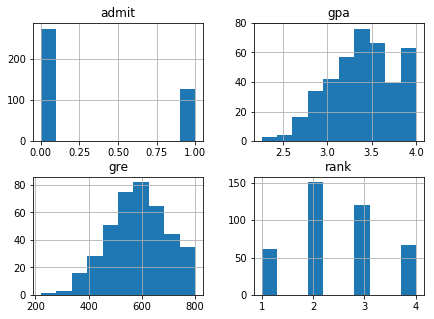

In [7]:
# Plot the histograms of the individual columns
df.hist(figsize=(7,5))
plt.show()

Rank is an ordinal variable. Here, we will convert to a set of dummies which will be used as a predictors in our logistic regression model.

In [8]:
dummy_ranks = pd.get_dummies(df['rank'], prefix='rank')
df = df.join(dummy_ranks)

Now we can fit the model.

In [9]:
# Fit the model
predictors = ['gpa', 'gre', 'rank_1', 'rank_2', 'rank_3', 'rank_4']
m = Logit(df['admit'], df[predictors])
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Let's take a look at the resulting regression parameters.

In [10]:
m.params

gpa       0.804038
gre       0.002264
rank_1   -3.989979
rank_2   -4.665422
rank_3   -5.330183
rank_4   -5.541443
dtype: float64

And, let's take a look at the model summary. We will discuss the meaning of these values later.

In [11]:
print(m.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: admit            AIC:              470.5175  
Date:               2019-05-01 10:39 BIC:              494.4663  
No. Observations:   400              Log-Likelihood:   -229.26   
Df Model:           5                LL-Null:          -249.99   
Df Residuals:       394              LLR p-value:      7.5782e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
gpa        0.8040     0.3318    2.4231   0.0154    0.1537    1.4544
gre        0.0023     0.0011    2.0699   0.0385    0.0001    0.0044
rank_1    -3.9900     1.1400   -3.5001   0.0005   -6.2242   -1.7557
rank_2    -4.6654     1.

Now, let's derive the estimates of the odds.

In [12]:
df.loc[:, 'p'] = m.predict(df[predictors])

We can now plot the relationship between the values of $Logit(p)$ and the odds $p$ along with the actual values of the response (admission).

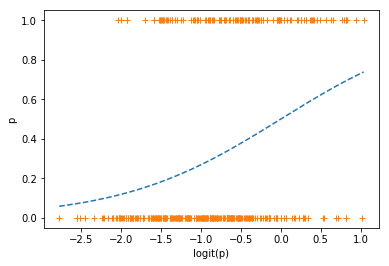

In [13]:
df = df.sort_values(by = ['p'], axis = 0)
plt.plot(logit(df.p), df.p, '--')
plt.plot(logit(df.p), df.admit, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

We can also plot a boxplot to see the distribution of the estimated odds for both values of the actual response.

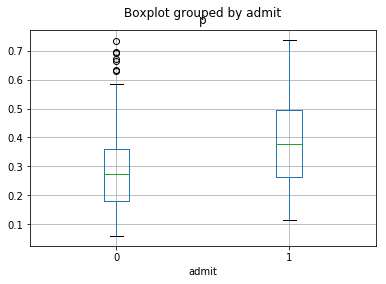

In [14]:
df.boxplot(column='p', by = 'admit')
plt.show()

Now, we will derive the binary estimates $\hat{y}$ of the response $y$.

In [15]:
df.loc[:, 'yhat'] = (df.p > 0.5) * 1
df.yhat.value_counts()

0    351
1     49
Name: yhat, dtype: int64

Finally, we can create a **confusion matrix** (discussed in a later section) to see how well our estimates match the actual values.

In [16]:
pd.crosstab(df.admit, df.yhat)

yhat,0,1
admit,,
0,254,19
1,97,30


In the confusion matrix above, we see that we have 254 cases where the student was correctly estimated to be not admitted and 30 cases where the student was correctly estimated to be admitted. The remaining 97 + 19 estimates were incorrect.

In [17]:
# More straightforward way
m.pred_table()

array([[254.,  19.],
       [ 97.,  30.]])

# Understanding Regression Output

Similar to linear regression, most software packages provide a standardized summary for logistic regression analysis. This summary typically contains several measures for evaluating regression, and is similar to summaries for linear regression (discussed in the previous module). However, there are several notable differences. Let's take a look at them.

We will print the summary of the model from the previous exercise.

In [18]:
print (m.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: admit            AIC:              470.5175  
Date:               2019-05-01 10:40 BIC:              494.4663  
No. Observations:   400              Log-Likelihood:   -229.26   
Df Model:           5                LL-Null:          -249.99   
Df Residuals:       394              LLR p-value:      7.5782e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
gpa        0.8040     0.3318    2.4231   0.0154    0.1537    1.4544
gre        0.0023     0.0011    2.0699   0.0385    0.0001    0.0044
rank_1    -3.9900     1.1400   -3.5001   0.0005   -6.2242   -1.7557
rank_2    -4.6654     1.

- **Converged** indicates whether the solver &mdash; the algorithm used to find the regression parameters (per default it is the Newton method) &mdash; converged successfully. Essentially, it indicates whether the regression analysis was successful or not.


- **No. Iterations** is the number of iterations the solver performed to find the solution.


- **Pseudo R-squared** is one of the measures for assessing the model quality. For more details, see the following section.


- **LL-null** is the log-likelihood of the null model &mdash; i.e. the model without predictors, where $\text{logit}(p) = \beta_0$. 


- **Scale** is the scale parameter for the covariance matrix. For more details see Rodríguez, G. (2007): http://data.princeton.edu/wws509/notes/c3.pdf


- **z** is the value of the **z-statistic**, which is calculated as:
 
 $$z_{\hat{\beta}} = \frac{\hat{\beta} - \beta_0}{s.e.(\hat{\beta})}$$
 
 
where $\beta_0$ is the null value against which we are testing the coefficient estimate. In this case (and in most cases) it is equal to zero.
 
 
- **P > $|$z$|$** is the p-value associated with the given parameter &mdash; i.e. the probability that the true value of the given regression parameter is equal to the null value, given the set of observations.

# Evaluation of the Logistic Regression Model

The response in logistic regression is a categorical variable, which means that $R^2$ and $\text{RMSE}$ are of no use here. When evaluating logistic regression models, we want to assess how well the estimates for $\hat{y}$ match the actual values of $y$.

Here, we describe several measures for evaluating logistic regression. Many of these are the subject of a much broader topic, know as **evaluation of binary classifiers**. 

**NOTE:** There are numerous other measures and approaches used to assess logistic regression.

## Pseudo R-squared

Analogous to the coefficient of determination $R^2$ for linear regression that measures the amount of variance captured by the model, logistic regression can be evaluated by a pseudo $R^2$. The word pseudo here is meant to highlight the fact that it is not an actual fraction of variance. There is currently no agreement upon how to formulate the best analogous measure of $R^2$ for logistic regression analysis. Therefore, there are multiple competing measures, commonly referred as a pseudo $R^2$.

Here are three common approaches for calculating pseudo R-squared:


| **Name** | **Formula** | **Notes** |
| :---: | :--- | :--- |
| Efron's $R^2$ | $$R^2 = 1 - \frac{\sum_i^N (y_i - p_i)^2}{\sum_i^N (y_i - \bar{y})^2}$$ |<ul><li>$y_i$ is the actual value of the $i$-th response</li><li>$\bar{y}$ is the mean of the response (i.e. fraction of y = 1)</li><li>$N$ is the number of observations</li><li>$p_i$ is the predicted odds of the $i$-th response</li></ul> |
| Cox and Snell's $R^2$ | $$R^2 = 1 - \Bigg(\frac{L_M}{L_0}\Bigg)^{\frac{2}{n}}$$ | <ul><li>$L_M$ is the log-likelihood of the actual model</li><li>$L_0$ is the log-likelihood of the null model</li></ul> |
| McFaddend's $R^2$ | $$R^2 = 1 - \Bigg(\frac{\text{ln}(L_M)}{\text{ln}(L_0)}\Bigg)$$ | <ul><li>$L_M$ is the log-likelihood of the actual model</li><li>$L_0$ is the log-likelihood of the null model</li><ul> |


## Confusion matrix

A **confusion matrix** is a matrix comprised of two rows and two columns:

Values|$$\mathbf{\hat{y} = 0}$$|$$\mathbf{\hat{y} = 1}$$|
:---:|:---:|:---:|
$$\mathbf{y = 0}$$|**TN**|**FP**|
$$\mathbf{y = 1}$$|**FN**|**TP**|

where:

- **TP** (**true positives**) is the number of cases where both the estimated and actual value were equal to 1.
 
 
- **FP** (**false positives**) is the number of cases where the estimated value was equal to 1, while the actual value was equal to 0.
 
 
- **FN** (**false negatives**) is the number of cases where the estimated value was equal to 0, while the actual value was equal to 1.
 
 
- **TN**  (**true negatives**) is the number of cases where both the estimated and actual value were equal to 0.
 
An example of a true positive case could be a spam email that was correctly moved to a spam box by the filtering algorithm. Similarly, a true negative case could be a regular email that was not moved to the spam box.

## Statistical accuracy 
 
Naturally, the better the model the greater number of true positives and true negatives, and the lower the number of false positives and false negatives. This idea can be embedded into the following formula:

$$\text{ACC} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}$$


which can be simplified to:

$$\text{ACC} = \frac{\text{TP} + \text{TN}}{N}$$


where:

 - ACC is the **statistical accuracy** of the model
 - TP and TN are the number of true positives and true negatives, respectively
 - FP and FN are the number of false positives and false negatives, respectively
 - N is the total number of observations
 
The statistical accuracy, or simply the **accuracy** of the logistic regression, is the most prominent measure for evaluation of logistic regression models. The value of accuracy ranges from 0 to 1, but accuracy is frequently reported as a percentage.

### A word of caution with statistical accuracy

Accuracy can be a very misleading indicator of the logistic regression model if the number of positive ($y = 1$) and negative cases ($y = 0$) is highly unbalanced. Imagine a scenario where out of 100 cases only 5 are positive. Then, even the trivial regression model ($\beta = 0$) whose estimates $\widehat{y}$ are always equal to zero will achieve 95% accuracy.

## Matthews correlation coefficient (MCC)

A common alternative to statistical accuracy is the **Matthews correlation coefficient (MCC)**, which is defined as:

$$\text{MCC} = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$$

The advantage of MCC over ACC is its robustness against an unbalanced binary response $y$. Its disadvantage is that it is harder to interpret than ACC.

## Precision, recall, specificity and F-score

Some additional measures to consider are:

- **Precision** (also known as positive predictive value) is the fraction of correct estimates of the positive estimates:

$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$


- **Recall** (also known as the true positive rate, or **sensitivity**) is the fraction of correct estimates of the positive response:

$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$


- **Specificity** (also known as the true negative rate) is the fraction of correct estimates of the negative response:

$$\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$


- **F1-score** (sometimes called F-measure, or Dice coefficient) is the harmonic mean of the precision and recall:

$$F_1 = 2\cdot\frac{\text{Precision}\cdot\text{Recall}}{\text{Precision} + \text{Recall}}$$


In some cases, we may put more emphasis on either precision or recall, which can be done as follows:

$$F_\beta = (1 + \beta^2)\cdot\frac{\text{Precision}\cdot\text{Recall}}{\beta^2 \cdot\text{Precision} + \text{Recall}}$$


where $\beta$ (non-negative real value) is a weighting factor, which indicates how much importance we give recall over precision ($\beta$ attaches $\beta$ times as much importance to recall than precision).

**NOTE:** Precision, recall and F-score require only true positives, false positives, and false negatives &mdash; but not true negatives. This limits their use to situations where we have certainty about the response being positive. This plays an important role in some applications, as we will see in the following example.

**Example**

Imagine $y$ is a binary response indicating whether two chemicals react.

- $y=1$ indicates that the reaction of the two chemicals was experimentally validated
- $y=0$ indicates otherwise

Here, we cannot be absolutely certain that the given chemicals **do not** react, as there is the possibility that they have never been tested.

Thus, accuracy, and MCC, cannot be used here &mdash; they require a statistic about true negatives, which in this case cannot be obtained.

**EXERCISE 2**

Evaluate the logistic regression model from the previous exercise using statistical accuracy, MCC, precision, recall, etc.

In [19]:
# Your work here

**Solution**

Let's begin with the confusion matrix.

In [20]:
conf_mat = m.pred_table()
print (conf_mat)

[[254.  19.]
 [ 97.  30.]]


Now we can extract the TP, FP, FN and TP.

In [21]:
tn, fp, fn, tp = conf_mat.flatten()
print (tn, fp, fn, tp)

254.0 19.0 97.0 30.0


Finally, we can calculate the accuracy, MCC, etc.

In [22]:
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model is: %1.2f" % acc)

Accuraccy of the model is: 0.71


In [23]:
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)

Mathews correlation coefficient between the estimates and the true response is: 0.24


In [24]:
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Model's precision is 0.61 and it's recall is 0.24


# Receiver Operating Characteristic

The **Receiver Operating Characteristic (ROC)** is a graphical, yet very powerful tool for evaluating logistic regression models. An ROC plot illustrates the relationship between the **true positive rate (TPR)** (sensitivity) and the **false positive rate (FPR)** (1 - specificity) at various discrimination threshold settings.

For each discrimination threshold, $d_{th}$, we will obtain a different set of estimates $\widehat{y}$. Sequentially increasing the discrimination threshold from $0$ to $1$, we obtain an increasing fraction of $\widehat{y} = 0$ estimates. For each set of estimates, we calculate the sensitivity and specificity. We can then plot the dependence of sensitivity on 1 - specificity. The resulting plot is referred to as the **Receiver Operating Characteristics** curve. 

Typically, the curve looks like the figure below &mdash; an arch bending above the identity line.

**Image Source**: Roccurves.png (2006) https://commons.wikimedia.org/wiki/File:Roccurves.png


![ROC_curve.png](attachment:ROC_curve.png "ROC curve")

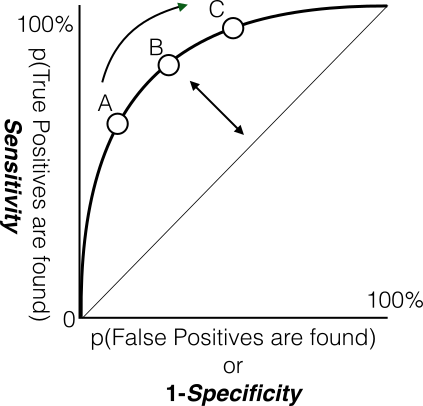

Sensitivity and (1 - Specificity) define what is called an **ROC space**. The top-left corner of the ROC space is often referred to as the **error-free point**. This is the point at which both sensitivity and specificity would be equal to 1 (i.e. all the estimates would be correct, either true positives or true negatives), and there would be no false positives or negatives. In practice, no ROC curve can achieve the error-free point, but **the closer to the error-free point the ROC curve goes, the better the model.**

  - A model that generates estimates at random is expected to produce an ROC curve identical to the identity line. 
  
  
  - A model that produces an ROC below the identity line is generating estimates that are worse than random. Estimates of such a consistently poor predictor could simply be inverted to obtain a good predictor.
  
There are various quantifying parameters summarizing the information comprised in the ROC. These include the **Area Under ROC Curve** and **Youden's J**.

## Area Under ROC Curve (AUROC)

By calculating the integral of the ROC curve, we obtain what is called the **area under the receiver operating characteristics curve (AUROC)** &mdash; often abbreviated as **AUC** (area under curve, which is also known as c-statitics, or a-prime). 

The AUC is equal to the probability that a model will estimate a randomly chosen binary response better than a random estimator.

The greater the AUC value, the better the model. 

  - A model whose estimates are generated at random is expected to result in $\text{AUC} = 0.5$ (area under the identity line).
  
  
  - A model that produces $\text{AUC} < 0.5$ performs worse than a random estimator.
  
AUROC is a very powerful measure for evaluation of the discrimination ability of logistic regression models. Its advantage over the measures we've covered previously (MCC, Accuracy, etc.) stems from the fact that it is independent of the particular choice of discrimination threshold and evaluates the model's overall capacity to discriminate between positive and negative responses across all possible thresholds.

## Youden's J

The point on the ROC curve that is closest to the **error-free point** (0,1) is the point where the sum of sensitivity and specificity is maximal. Therefore, the discrimination threshold corresponding to that point is often considered to be the **optimal threshold**. The vertical distance between this point and the identity line is called **Youden's J**: 

**Image Source**: Roc Curve Youden J.png (2014), https://commons.wikimedia.org/wiki/File:ROC_Curve_Youden_J.png

![ROC_Curve_Youden_J.png](attachment:ROC_Curve_Youden_J.png "Youden J visualisation")

Youden's J is an important measure characterizing to what extent the sensitivity and specificity of the model can be maximized by optimal choice of the threshold. 

Mathematically, Youden's J can be expressed by means of sensitivity and specificity as follows:

$$J = \text{max}\{\text{sensitivity} + \text{specificity} - 1\}$$
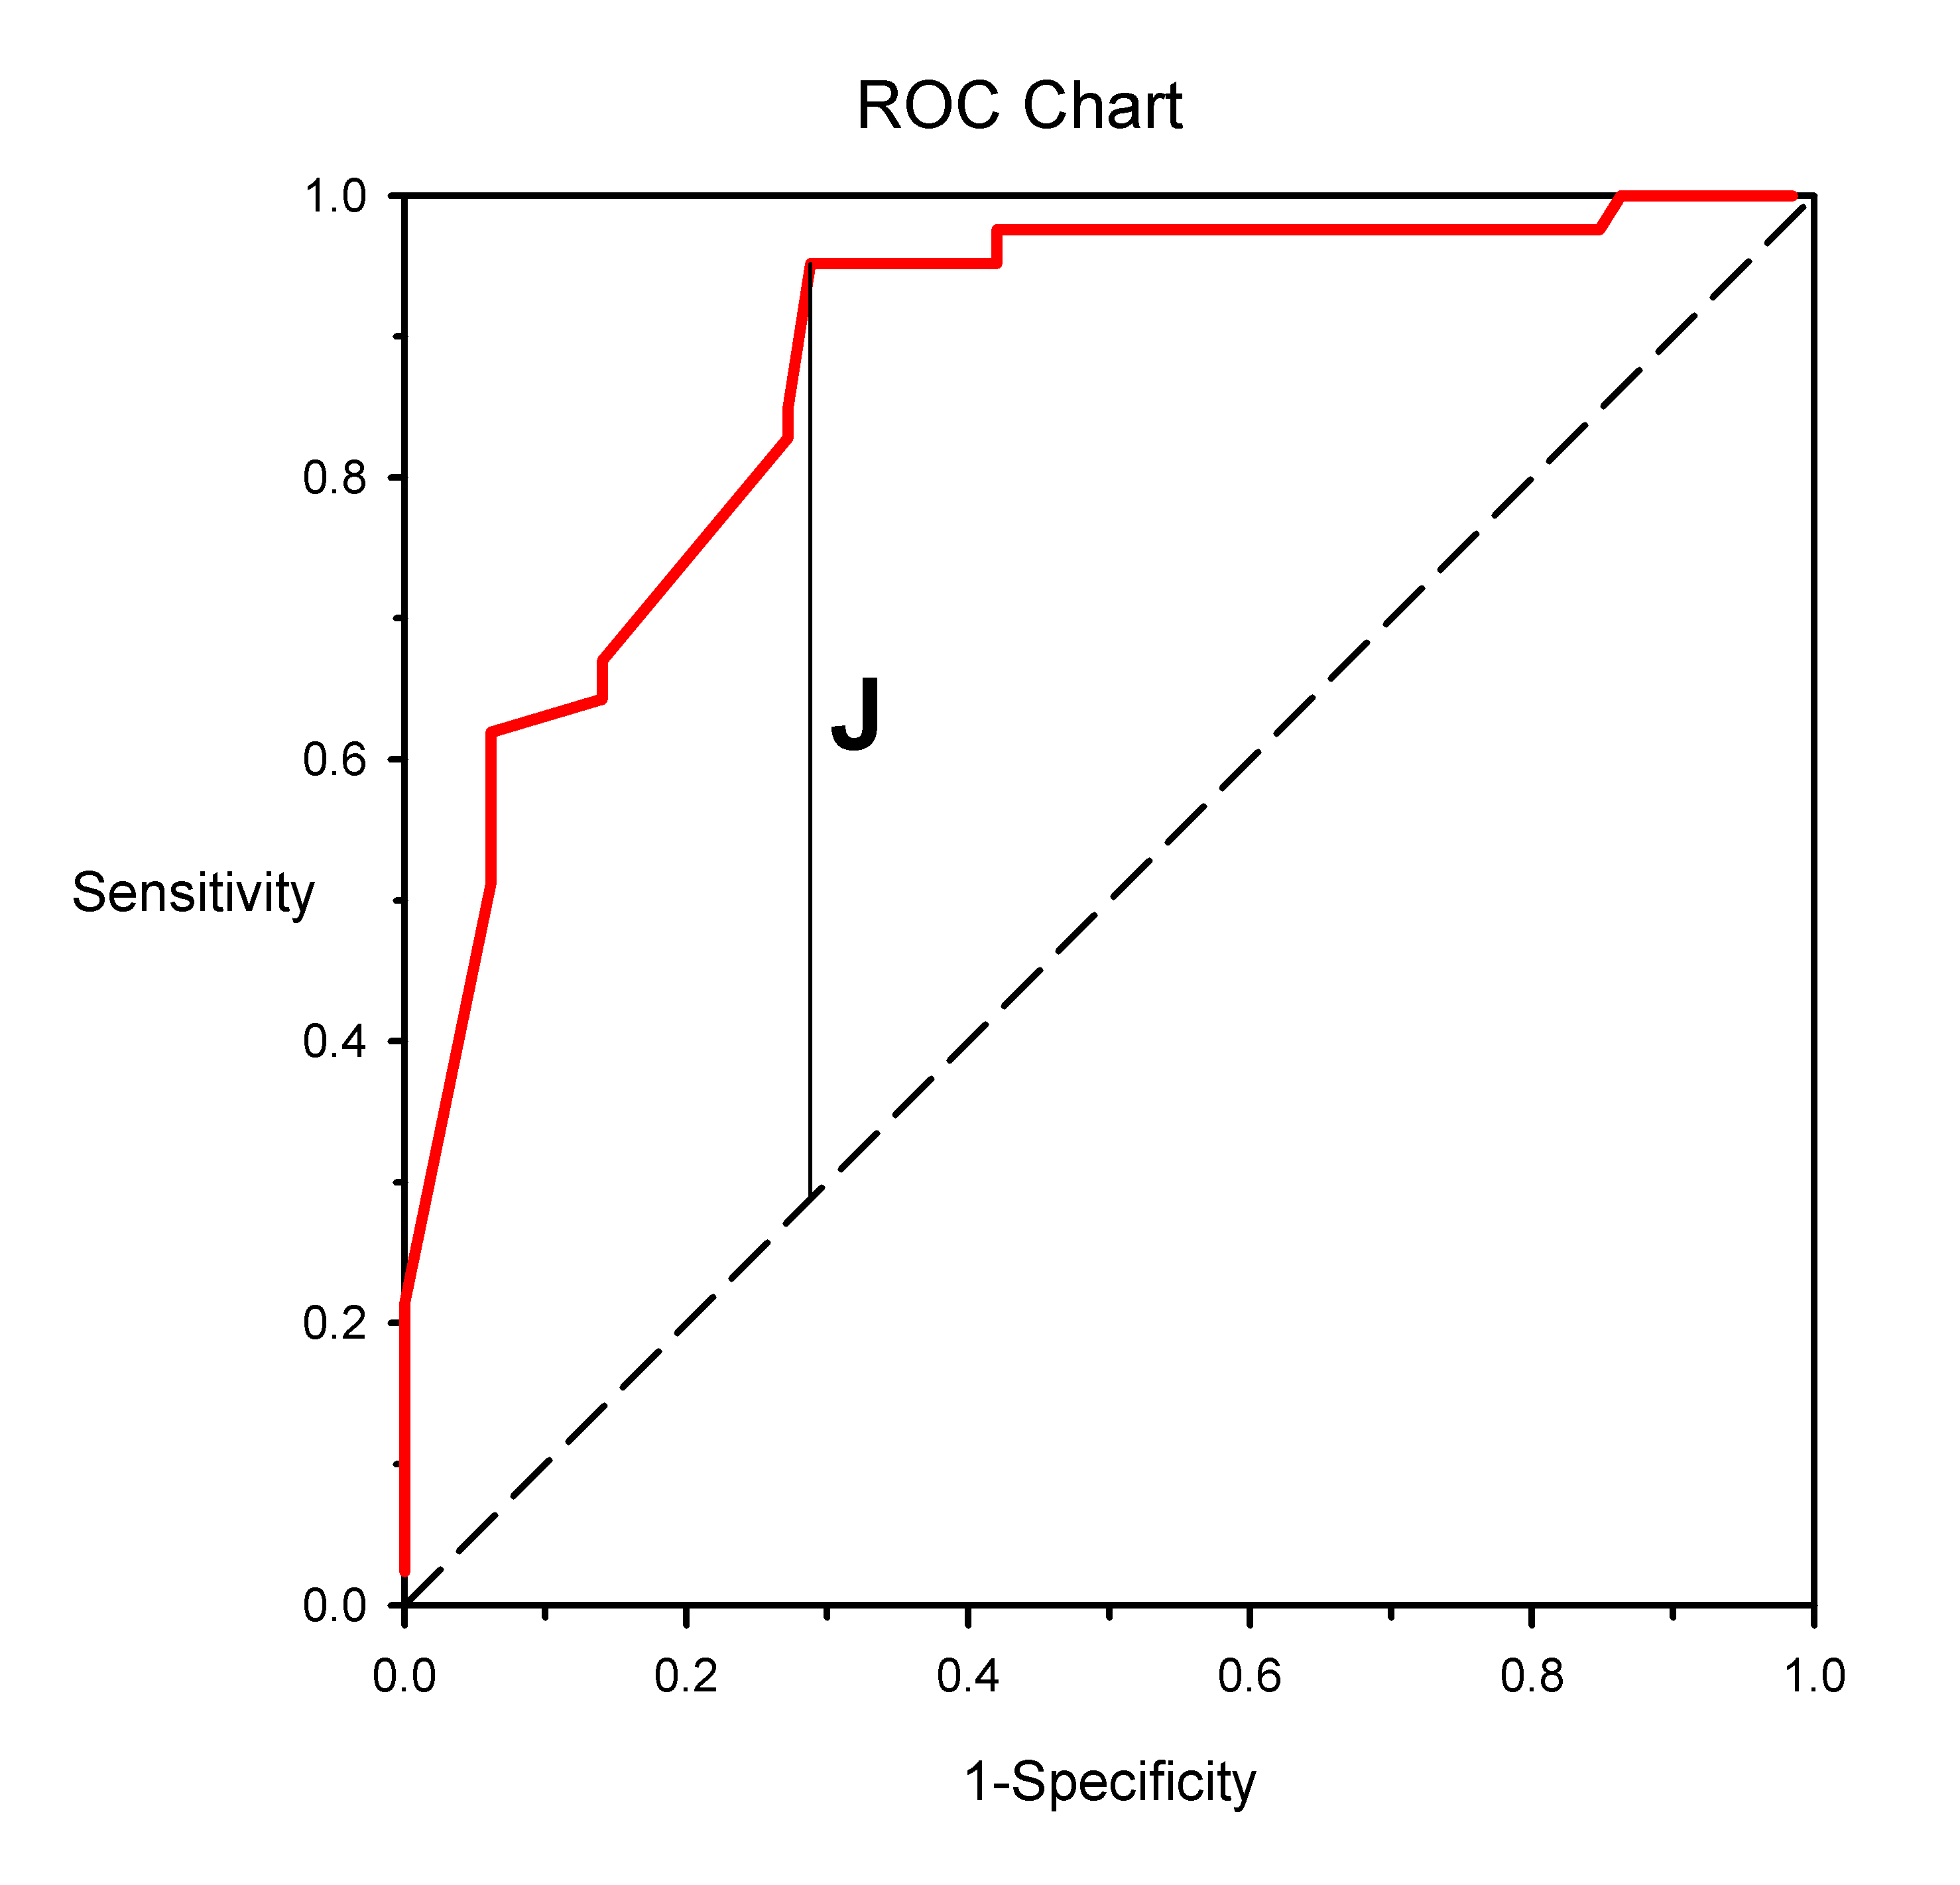

## Point of balance

The intercept of the ROC curve with a diagonal line which goes from the top-left corner to the bottom-right corner, indicates the point of the ROC curve where specificity equals sensitivity, and is called the point of balance. The corresponding value of the discrimination threshold is also often considered optimal. The product of specificity and sensitivity is another important measure for evaluating a logistic regression model.

**EXERCISE 3**

  - Generate receiver operating characteristics (ROC) of the logistic regression model from the previous exercises
  - Calculate the area under the ROC curve
  - Identify the point where the model's sensitivity is equal to its specificity
  - Identify the point that maximizes the sum of sensitivity and specificity
  - Identify the point corresponding to the default discrimination threshold ($d_{th} = 0.5$)

In [25]:
# Your work here

**Solution**

We will first generate the ROC curve. For the set of pre-specified discrimination thresholds, we will calculate sensitivity and specificity. 

We will also calculate the accuracy and MCC which we will use in the following exercise.

In [26]:
# Set discrimination thresholds
ths = np.arange(0., 1.0, 0.025)

# Containers
sensitivity = []
specificity = []
accuracy = []
matthews = []

# Main loop
for th in ths:
    # Generate estimates
    conf_mat = m.pred_table(threshold=th)
    
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()
    
    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)    
    
    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    

    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    matthews.append(mcc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [27]:
# Bind all the numbers together
roc = pd.DataFrame({'discret_thr' : ths, 
                    'sensitivity' : sensitivity, 
                    'specificity' : specificity,
                    '_specificity' : [1 - x for x in specificity],
                    'accuracy' : accuracy, 
                    'matthews' : matthews})

# Sort by 1 - specificity so we can plot it easily
roc = roc.sort_values(by = "_specificity")

Now we can plot the ROC curve.

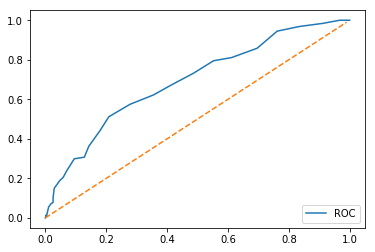

In [28]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.legend(loc = 4)

We will calculate the AUC, by integrating the sensitivity as a function of 1 - specificity.

In [29]:
auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
print ("Area under ROC curve = %1.2f" % auc)

Area under ROC curve = 0.69


We can now identify the threshold corresponding to the balanced sensitivity and specificity. 

In [30]:
# Where threshold equal 0.5
idx_default_th = np.where(roc.discret_thr == 0.5)[0][0]

# Max sum of spec and sens
idx_youdensj = np.argmax(roc.sensitivity + roc.specificity)

 # Balanced spec and sens
idx_ballance = np.argmin(np.abs(roc.sensitivity - roc.specificity))

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Now we will highlight the point corresponding to the selected thresholds within the ROC curve.

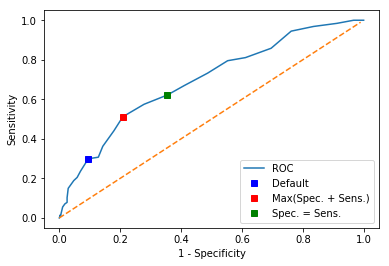

In [31]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')


plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

Now we can take a look at the confusion matrix at different points of the ROC curve.

In [32]:
m.pred_table(threshold=roc.discret_thr[idx_youdensj])

array([[216.,  57.],
       [ 62.,  65.]])

In [33]:
m.pred_table(threshold=roc.discret_thr[idx_ballance])

array([[176.,  97.],
       [ 48.,  79.]])

Finally we can calculate Youden's J.

In [34]:
J = max(roc.sensitivity + roc.specificity - 1)
print ('Youden\'s J = %1.2f' % J)

Youden's J = 0.30


# Setting the Discrimination Threshold

Logistic regression models are always **well calibrated** &mdash; i.e. the mean of the predicted odds is equal to mean of the binary response. Mathematically, this is represented as:

\begin{equation}
    \frac{1}{n} \sum_i^n p_i = \frac{1}{n} \sum_i^n y_i
\end{equation}

Or, in a more compact form:

\begin{equation}
    \sum^{n}_i p_i - y_i = 0
\end{equation}

An important consequence of this fact is that by using the default **discrimination threshold** $p_{th} = 0.5$, we may sometimes obtain estimates that are quite off the actual response values, and the number of predicted positives ($\widehat{y} = 1$) can be much lower/higher than the actual number of positives ($y = 1$). In such cases, we say that the model is not **discriminative**.

**Example**

We can take a look at the mean of the predicted odds of the model from the previous exercises and compare it to the mean of the actual response.

In [35]:
print ('Odds mean: %1.2f' % np.mean(df['p']))
print ('Response mean: %1.2f' % np.mean(df['admit']))

Odds mean: 0.32
Response mean: 0.32


Now we will compare the number of predicted and true positives.

In [36]:
print ('Predicted positives #: %i' % np.sum(df['p'] > 0.5))
print ('True positives #: %i' % np.sum(df['admit'] > 0.5))

Predicted positives #: 49
True positives #: 127


Or, we can take another look at the confusion matrix.

In [37]:
print (conf_mat)

[[273.   0.]
 [127.   0.]]


In [38]:
# Predicted negatives and positives
conf_mat.sum(axis = 0)

array([400.,   0.])

In [39]:
# Actual negatives and positives
conf_mat.sum(axis = 1)

array([273., 127.])

<br>

To tackle this issue, we may need to shift the discrimination threshold $p_{th}$ used to derive the estimates $\hat{y}$:


\begin{equation}
  \widehat{y}_i =
  \begin{cases}
    1 & \text{if $p_i > p_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

Shifting the discrimination threshold, we may improve the discrimination of the model. 

  - By lowering the threshold $p_{th}$ we are increasing the number of predicted positives ($\widehat{y} = 1$), while by increasing the threshold we are decreasing that number


  - Increasing the number of predicted positives ($\widehat{y} = 1$) increases the chances of **type I error** or **false positive rate**


  - Decreasing the number of predicted positives ($\widehat{y} = 1$) increases the chances of **type II error** or **false negative rate**

**NOTE:** We must always be very careful when adjusting the discrimination threshold. The discrimination threshold can be set to maximize some of the measures we described above:

  - **Maximizing accuracy** will maximize the fraction of true estimates (TP + TF). This can be very misleading in cases where the response is very unbalanced.
  
  
  - **Maximizing MCC** will maximize the "correspondence" between the estimates and actual response values.
  
As indicated in the previous section, the discrimination threshold can be set using the **Receiver Operating Characteristic (ROC)** so that the selected threshold:

  - **Maximizes the sum of sensitivity and specificity** (Youden's J)
  
  
  - **Balances the sensitivity and specificity** (Point of balance)
  
**NOTE:** Maximizing the MCC will also maximize the **sum of sensitivity and specificity**. You can see this easily by comparing the formula of MCC and those for sensitivity and specificity.

**EXERCISE 4**

Using the logistic regression model from the previous exercises:

1. Plot the dependence of the accuracy and MCC on the choice of the discrimination threshold.<br><br>
  
2. Optimize the discrimination threshold to:<br>

    - Maximize the statistical accuracy of the model<br><br>
  
    - Maximize the MCC of the model<br><br>
  
3. Use the ROC to highlight the ROC points that correspond to the obtained thresholds. How much do the obtained thresholds differ from the ROC points identified in the previous exercises?

In [40]:
# Your work here

**Solution**

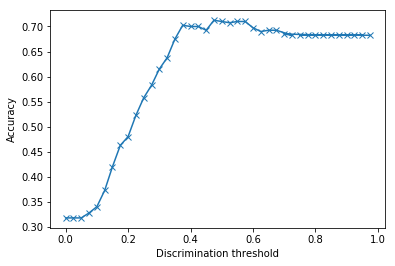

In [41]:
plt.plot(roc.discret_thr, roc.accuracy, 'x-')
plt.xlabel('Discrimination threshold')
plt.ylabel('Accuracy')
plt.show()

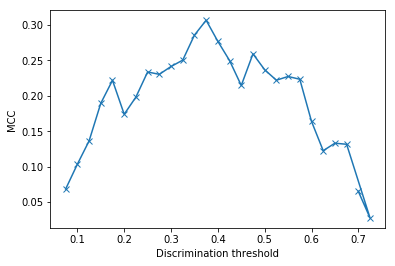

In [42]:
plt.plot(roc.discret_thr, roc.matthews, 'x-')
plt.xlabel('Discrimination threshold')
plt.ylabel('MCC')
plt.show()

Identify the points of the ROC curve where the obtained accuracy and MCC reach their respective maxima.

In [43]:
idx_maxacc = np.argmax(roc.accuracy)
idx_maxmcc = np.argmax(roc.matthews)

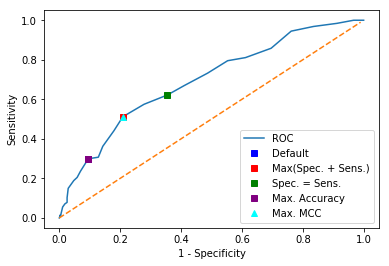

In [44]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')

plt.plot(roc._specificity[idx_maxacc], 
         roc.sensitivity[idx_maxacc], 
         's', color = 'purple',
         label = 'Max. Accuracy')

plt.plot(roc._specificity[idx_maxmcc], 
         roc.sensitivity[idx_maxmcc], 
         '^', color = 'cyan', 
         label = 'Max. MCC')

plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

The ROC point of maximal accuracy is quite distant from the maximal MCC. The maximal MCC is identical to the maximum of the sum of specificity and sensitivity. The ROC point of balanced sensitivity and specificity differs from both maximal accuracy and maximal MCC. 

This highlights the fact that the model's discrimination threshold can be optimized in multiple ways.

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments, and to the next module.

# References


Czepiel, S.A. (1999). *Maximum Likelihood Estimation of Logistic Regression Models: Theory and Implementation* Retrieved Dec 11, 2018 from czep.net/stat. 

Multicollinearity, n.d. Retrieved Dec 11, 2018 from Wikipedia. https://en.wikipedia.org/wiki/Multicollinearity

Roccurves.png (2006). Retrieved Dec 11, 2018 from Wikimedia Commons. https://commons.wikimedia.org/wiki/File:Roccurves.png Creative Commons Attribution-Share Alike 3.0 Unported.

Roc Curve Youden J.png (2014). Retrieved Dec 11, 2018 from Wikimedia commons. https://commons.wikimedia.org/wiki/File:ROC_Curve_Youden_J.png  Creative Commons Attribution-Share Alike 4.0 International.

Rodríguez, G. (2007). Lecture Notes on Generalized Linear Models. Chapter 3: Logit Models for Binary Data http://data.princeton.edu/wws509/notes/

Weisstein, E. W. (2018). *Maximum Likelihood.* MathWorld-A Wolfram Web Resource. Retrieved Dec 11, 2018 form http://mathworld.wolfram.com/MaximumLikelihood.html



